# Simple Linear Regression


Estimated time needed: **15-30** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In case you're working **locally** uncomment the below line. 


In [4]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0  66349      0  0:00:01  0:00:01 --:--:-- 66449



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


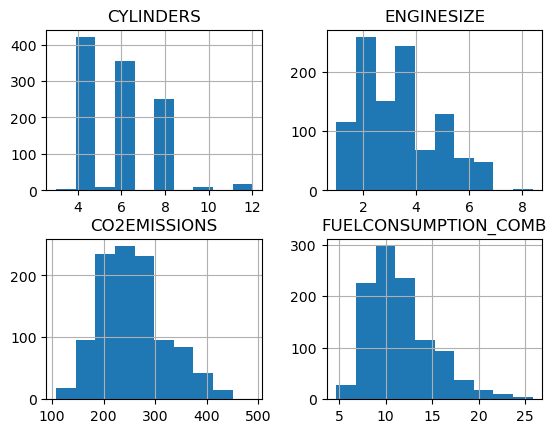

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


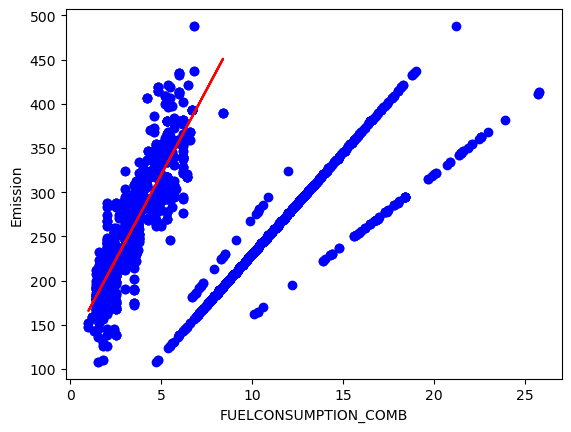

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Analizant el grafic: 

- x: consum combinat de combustible (l/100km)
- y: emisions de co2 (grams/km)

-> Hi ha una relacio linial clara. A mesura que aumenta el consum de combustible tmb augmenten les emisions de CO2
-> dos linies separades: 2 grups de vehicles amb patrons diferents

a l'haver un forta correlacio linial justificaria utilitzar un **model de regressio linial** per predir emisions a partir del consum

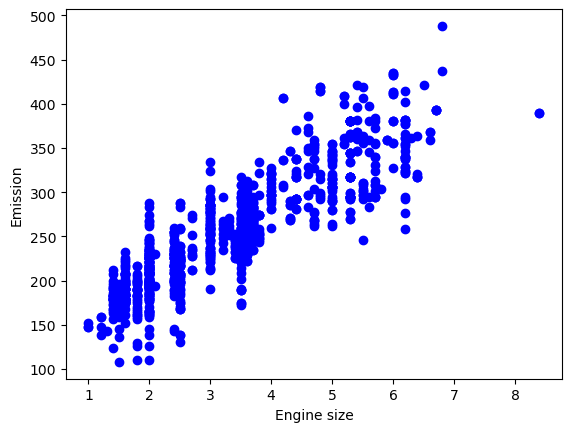

In [19]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Analizant el grafic: 

- x: tamany motor 
- y: emisions de co2

-> Hi ha una relacio bastant linial. A mesura que aumenta la mesura del motor tmb augmenten les emisions de CO2
-> bastant linial pero amb mes dispersio que l'anterior

motors mes grans consumeixen mes combustible pertant contaminen mes

- on hi ha mes concentracio de punts es en els vehicles amb motors entre 1.5 i 4 litres 
- els punts es dispersen mes (mes variabilitat en les emisions per un mateix engine size)

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


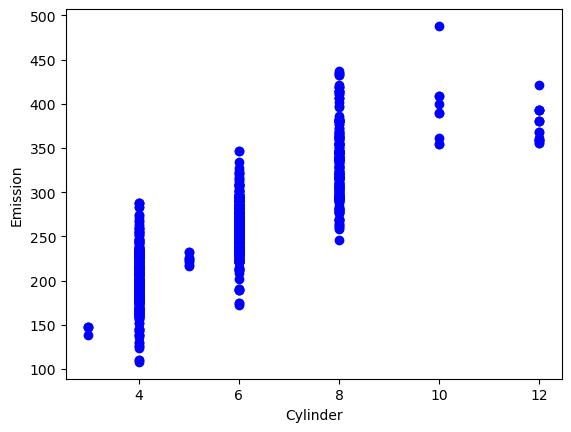

In [20]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()


Analisis:
- en general, com mes cilindres mes emisions
- valors del eix x son discrets (3, 4, 6, 8, 10, 12) fent que els punts no estiguin escampats sino verrticals a diferencia dels valors continuus d'abans 

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [21]:
msk = np.random.rand(len(df)) < 0.8 #genera array de numeros aleatoris entre 0 i 1 amb la mateixa longitud que el dataframe [0.94, 0.13, 0.5...] + < 0.8 genera una mascara booleana amb true si <0.8 i false sino
# aprox el 80% dels casos seran true 
train = cdf[msk] # filtra el dataframe seleccionant nomes les files on msk es true 80%
test = cdf[~msk] # filtra el dataframe seleccionant nomes les files on msk es false 20%

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


Entrenar un model per predir les emissions de co2 a partir de la mida del motor
y^​=β0​+β1​⋅x
x = mida del motor ewngine size
y = co2 emissions
el model aprendra quins valors de b0 y b1 aproximen millor la relacio

"residual sum of squares":
- residual : diferencia entre el valor real i el valor predit pel model = Yreal - Ypred (es l'error que comet el model en cada prediccio)
- sum of squares: sumem els quadrats del residus = sum(Yreal - Ypred)^2 -> elevar al quadrat fa que no es cancelin valors + i - i donem mes pes als errors grans

"minimize the residual .."
hem de intentar minimitzar la suma d'errors quadrats sigui la mes eptita posible: es a dir: "to minize the residual sum of squares" vol dir: trobar la linia recta que comet el menor error global posible en predir els valors reals de y

#### Train data distribution


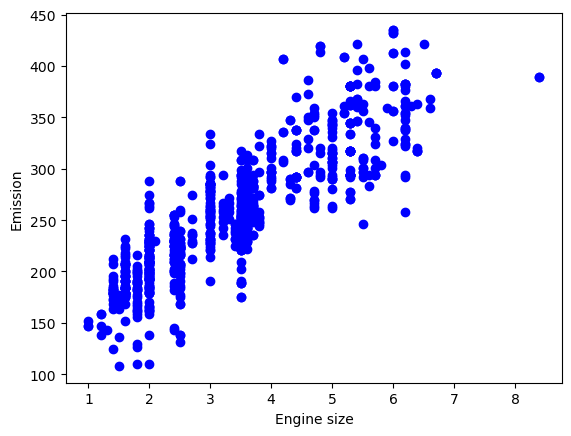

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

com que hi ha una relacio linial visible podem entrenar el model ja que justifica usar un model de regressio linial

#### Modeling
Using sklearn package to model data.


In [23]:
from sklearn import linear_model
# crear el model de regr linial
regr = linear_model.LinearRegression()
# np.asanyarray: ho convertei xen un array de numpy per passa-lo al model (sklearn prefer)
# variable predictora x, variable a predir y
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# el model apren la relacio entre enginesize i co2emissions
# internament esta calculant la millor recta que s'ajusta a les dades 
regr.fit(train_x, train_y)
# The coefficients
# regr.coef: el pendent de la recta (quan augmenta CO2 per cada litre mes de motor)
print ('Coefficients: ', regr.coef_)
# regr.intercept_ : el punt on la recta tallat l'eix Y (valors base de co2 quan enginesize = 0 fase)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.56777724]]
Intercept:  [127.05226004]


CO2EMISSIONS=38.5⋅ENGINESIZE+127.3

coeficient: quant puja o baixa per cada unitat de x
intercept: y quan x = 0

aprenentatge de cop, NO pas a pas! necesita tenir totes les file sde dades d'entrenament a l'hora per poder extreure'n laformula 

As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


Calcul manual matematic: 

Pendent: b1 = ∑(xi​−xˉ)(yi​−yˉ​)​/∑(xi​−xˉ)^2 = np.sum((x-x_mean) * (y-y_mean)) / np.sum((x-x_mean)**2)
Intercept : b0 = yˉ​−b1⋅x = y_mean - b1*x_mean

#### Plot outputs


We can plot the fit line over the data:


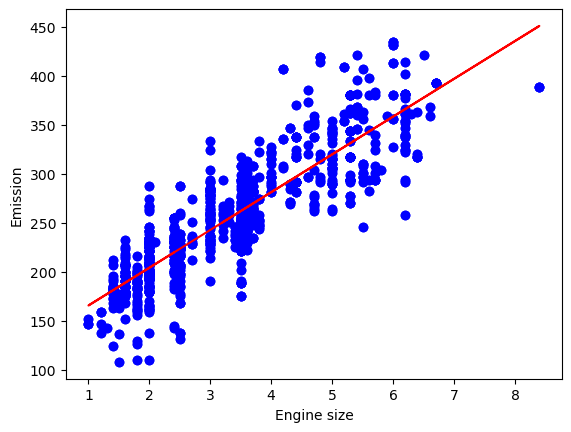

In [28]:
# scatter per visualitzar dades reals ja que fa punts individuals
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# plot dibuixa una linea per a funcions com la linia de regr
# '-r' linia vermella  plot(x, y, estil)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
# mitjana dels errors absoluts
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
MAE=1/n​∑∣yi​−y^​i​∣ ( diferencia entre el valor real y el predit)

# mitjana dels errors elevats al quadrat 
* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. Resiudal sum of squares
MSE=1/n​∑(yi​−y^​i​)2
penalitza errors grans

# Arrel quadrada del MSE
* Root Mean Squared Error (RMSE). 
RMSE=sqrt(MSE)  ->> aixo retorna el MSE a la seva unitat original, si tenies grams^2 al fer RMSE et queda grams un altre cop
​
# Coeficient de determinacio. No es un error, es una mesura de bondat de l'ajust
* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
1 = el model s'ajusta perfectament
0 = el model no explica gens la variabilitat de les dades
<0 = el model es pitjor k no fer res xd


In [30]:
from sklearn.metrics import r2_score # per calucula el coeficient de determinacio R^2

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x) # prediccions: valors predits pel model entrenat

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y))) # et diu de mitjana quant t'estas equivocant ( es un valor interpretable ja que es en les unitats de y )
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2)) # Mesura l'error total que comet el model en les prediccions donant mes pes als errors grans
print("R2-score: %.2f" % r2_score(test_y , test_y_) ) # 

Mean absolute error: 22.79
Residual sum of squares (MSE): 888.78
R2-score: 0.80


MAE = 22.79 vol dir que de mitjana el model s'equivoca 22.79 grams de CO2 per km quan fa la prediccio
MSE = 888.78 es lamitjana dels erros al quadrat que ha comes el model ( error no directament interpretable  ja que esta elevat al ^2)
R2 = 0.8 es una bona performance. el model es capaç d'explicar el 80% de la variabilitat de les emuissions de co2 (y) a partir deenginesize(X). laltre 20% de variabilitat no exoplicada, podria ser degut als cilindres,etc


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [31]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

<details><summary>Click here for the solution</summary>

```python    
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [32]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
#pendent de la recta (quant augmenta co2 per cada fuel consumption)
print ('Coefficients: ', regr.coef_)
# punt de la recta tallat per leix y
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.03022083]]
Intercept:  [70.3253107]


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [34]:
predictions = regr.predict(test_x) # aqui obtinc test_y_ que son els valors predits 
#mitjançant la data test i utilitzant la regresio feta amb la data train


array([[206.58218776],
       [230.627519  ],
       [256.27587233],
       [320.39675565],
       [317.19071148],
       [320.39675565],
       [219.40636442],
       [203.37614359],
       [251.46680608],
       [249.863784  ],
       [217.80334234],
       [253.06982816],
       [256.27587233],
       [277.11515941],
       [216.20032025],
       [235.43658525],
       [235.43658525],
       [334.8239544 ],
       [374.89950647],
       [204.97916567],
       [216.20032025],
       [230.627519  ],
       [196.96405526],
       [273.90911524],
       [241.84867358],
       [217.80334234],
       [291.54235816],
       [209.78823192],
       [267.49702691],
       [254.67285025],
       [227.42147484],
       [201.77312151],
       [222.61240859],
       [224.21543067],
       [214.59729817],
       [251.46680608],
       [243.45169567],
       [275.51213733],
       [253.06982816],
       [307.57257899],
       [307.57257899],
       [392.53274938],
       [272.30609316],
       [262

<details><summary>Click here for the solution</summary>

```python    
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [36]:
#ADD CODE
mae = np.mean(np.absolute(predictions - test_y))
print("Mean Absolute Error: %.2f" % mae)


Mean Absolute Error: 19.67


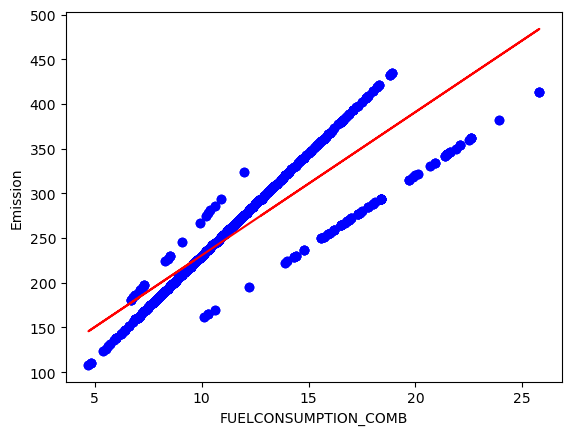

In [38]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

having a MAE 19.67 means that, on average, the model is off by about 19.67 grams of co2 per km when making predictions

<details><summary>Click here for the solution</summary>

```python    
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


### Repeat everything you did using two additional regression models [optional]

### Thank you for completing the lab!